In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [728]:
data = pd.read_csv("Ice_cream selling data.csv")

In [729]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [730]:
data.shape

(49, 2)

In [731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [732]:
data.duplicated().sum()

np.int64(0)

In [733]:
data.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

<Axes: xlabel='Temperature (°C)'>

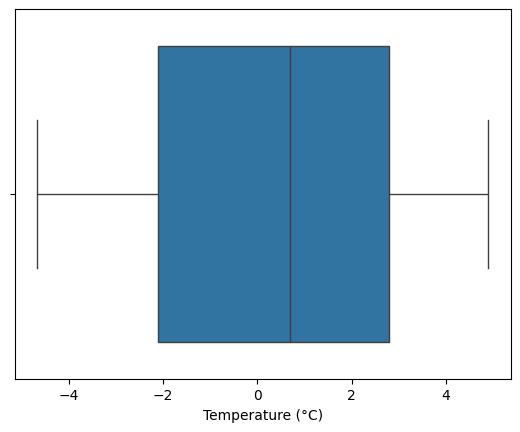

In [734]:
sns.boxplot(data, x=data['Temperature (°C)'])

In [735]:
x = data['Temperature (°C)'].values.reshape(-1,1)
y = data['Ice Cream Sales (units)'].values.reshape(-1,1)

In [736]:
from scipy.stats import skew
y_skew = skew(y)
y_skew

array([0.54761436])

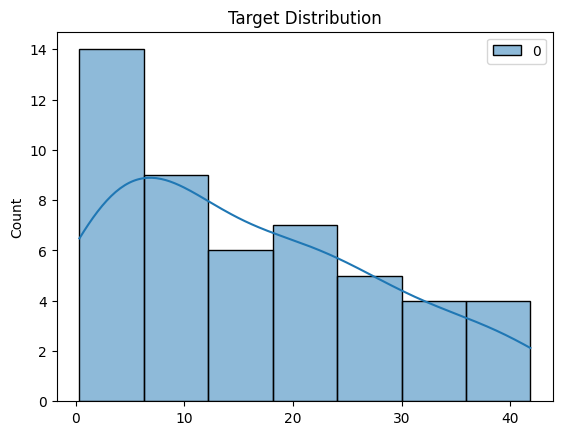

In [737]:
sns.histplot(y, kde=True)
plt.title("Target Distribution")
plt.show()

In [748]:
cor = data.corr()

<Axes: >

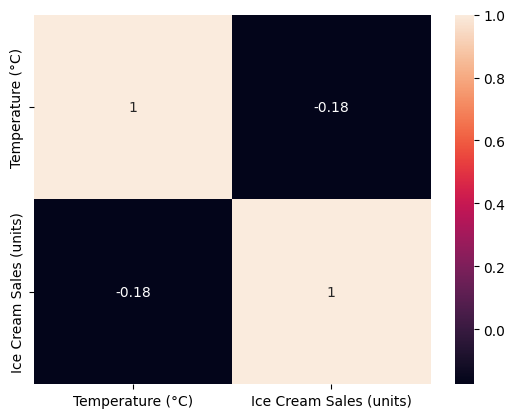

In [750]:
sns.heatmap(cor,annot=True)

In [738]:
from sklearn.preprocessing import PowerTransformer

In [739]:
# pt = PowerTransformer(method='yeo-johnson')
# y_trans = pt.fit_transform(y)

In [740]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True,random_state=0)

In [741]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [742]:
# count = 0
# acc = 0.0
# for i in range(101):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=14)

from sklearn.pipeline import Pipeline
model = Pipeline([("poly",PolynomialFeatures(degree=2)),("lr",LinearRegression())])
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# if r2 > acc and r2 < 96:
#     random = i
#     acc = r2
# print(f"count is: {count}, acc is: {acc}")

In [743]:
range_mse = np.max(y)-np.min(y)
mae = mean_absolute_error(y_test,y_pred)
mae/range_mse

np.float64(0.0533006113901084)

In [744]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R2 Score: 0.95
Mean Squared Error: 6.17
Mean Absolute Error: 2.21


In [747]:
import pickle
pickle.dump(model,open(r'C:\Users\sevug\Desktop\New folder\bigdatahandson\ice_cream_selling_prediction\testing\poly_linear.pkl','wb'))